In [1]:
import jax
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mapc_dcf.constants import *

P_COL = 0.1034
N_FRAMES = 1e5
SEED = 423

In [2]:
def plot_cw(cws):

    # Calculate the histogram of the CW values
    bins = [16, 32, 64, 128, 256, 512, 1024, 1024]
    labels = [str(b) for b in bins]
    hist, _ = np.histogram(cws, bins=bins)

    # Plot the CW distribution 
    plt.figure(figsize=(5, 3))
    plt.bar(labels[:len(hist)], hist)
    plt.xlabel('CW Value')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.yscale('log')
    plt.ylim(bottom=0.5)
    plt.grid(axis='y')

    return hist

True p_col:         0.1034
Estimated p_col:    0.10275275454904353
Mean backoff:       8.51528012059003
Jump ratios:        [0.10245    0.10590532 0.10506912 0.06140351 0.14285714 0.        ]


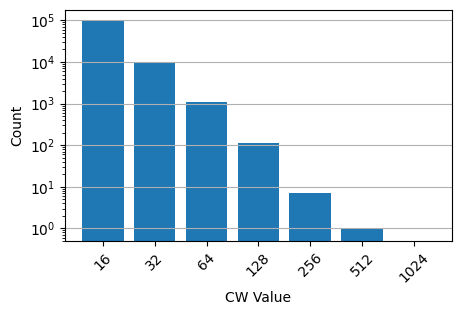

In [3]:
cws = []
backoffs = []
total_frames = 0
collisions = 0
cw = 2**CW_EXP_MIN
key = jax.random.PRNGKey(SEED)
for frame in range(1, int(N_FRAMES) + 1):
    success = False
    while not success:
        
        # Comment backoff selection to speed up the runtime
        key, key_backoff = jax.random.split(key)
        backoff = jax.random.randint(key_backoff, shape=(1,), minval=0, maxval=cw).item()
        backoffs.append(backoff)

        cws.append(cw)
        collision = np.random.rand() <= P_COL
        total_frames += 1
        if collision:
            cw = min(2*cw, 2**CW_EXP_MAX)
            collisions += 1
        else:
            success = True
            cw = 2**CW_EXP_MIN

p_col = collisions / total_frames
frequencies = plot_cw(pd.Series(cws))

print(f"True p_col:         {P_COL}")
print(f"Estimated p_col:    {p_col}")
print(f"Mean backoff:       {np.mean(backoffs)}")
print(f"Jump ratios:        {frequencies[1:] / frequencies[:-1]}")